In [1]:
from pyspark.sql import SparkSession

def read_metrics():
    spark = SparkSession.builder.appName("ReadMetrics").getOrCreate()
    
    # Chemins vers les fichiers Parquet sur HDFS
    path_total_loans_per_school = "hdfs://localhost:9080/user/anthonycormeaux/data/total_loans_per_school"
    path_total_loans_per_state = "hdfs://localhost:9080/user/anthonycormeaux/data/total_loans_per_state"
    path_loan_evolution = "hdfs://localhost:9080/user/anthonycormeaux/data/loan_evolution"
    path_to_joined = "hdfs://localhost:9080/user/anthonycormeaux/data/result/joined_data"
    
    # Lire les DataFrames depuis les fichiers Parquet
    total_loans_per_school = spark.read.parquet(path_total_loans_per_school)
    total_loans_per_state = spark.read.parquet(path_total_loans_per_state)
    loan_evolution = spark.read.parquet(path_loan_evolution)
    joined_data = spark.read.parquet(path_to_joined)

    return total_loans_per_school, total_loans_per_state, loan_evolution, joined_data


In [2]:
def convert_to_pandas(df_spark):
    return df_spark.toPandas()

def main():
    total_loans_per_school, total_loans_per_state, loan_evolution, joined_data = read_metrics()
    
    # Convertir en DataFrames Pandas
    pdf_total_loans_per_school = convert_to_pandas(total_loans_per_school)
    pdf_total_loans_per_state = convert_to_pandas(total_loans_per_state)
    pdf_loan_evolution = convert_to_pandas(loan_evolution)
    pdf_joined_data = convert_to_pandas(joined_data)

    return pdf_total_loans_per_school, pdf_total_loans_per_state, pdf_loan_evolution, pdf_joined_data


In [3]:
pdf_total_loans_per_school, pdf_total_loans_per_state, pdf_loan_evolution, pdf_joined_data = main()

24/11/22 19:41:08 WARN Utils: Your hostname, MacBook-Air-de-Anthony.local resolves to a loopback address: 127.0.0.1; using 192.168.1.30 instead (on interface en0)
24/11/22 19:41:08 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/11/22 19:41:08 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
24/11/22 19:41:12 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [4]:
pdf_loan_evolution.head(5)

,Quarter_Start,Quarter_End,Total_Subsidized,Total_Unsubsidized,Total_Stafford,Total_PLUS,Total_Loans
0,01/01/2010,03/31/2010,3794285968,4716054304,440629711,339532754,9290502737
1,04/01/2010,06/30/2010,1669725036,2190062232,160470953,289801589,4310059810
2,07/01/2009,09/30/2009,13004195235,16104302893,3214530840,2718541924,35041570892
3,10/01/2009,12/31/2009,4753612906,5902620671,766093099,391471685,11813798361


/var/folders/rm/47tt4n7s30533krtvlkg53340000gn/T/ipykernel_47431/1320419402.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_schools, x='Total_Loans', y='SchoolName', palette='viridis')


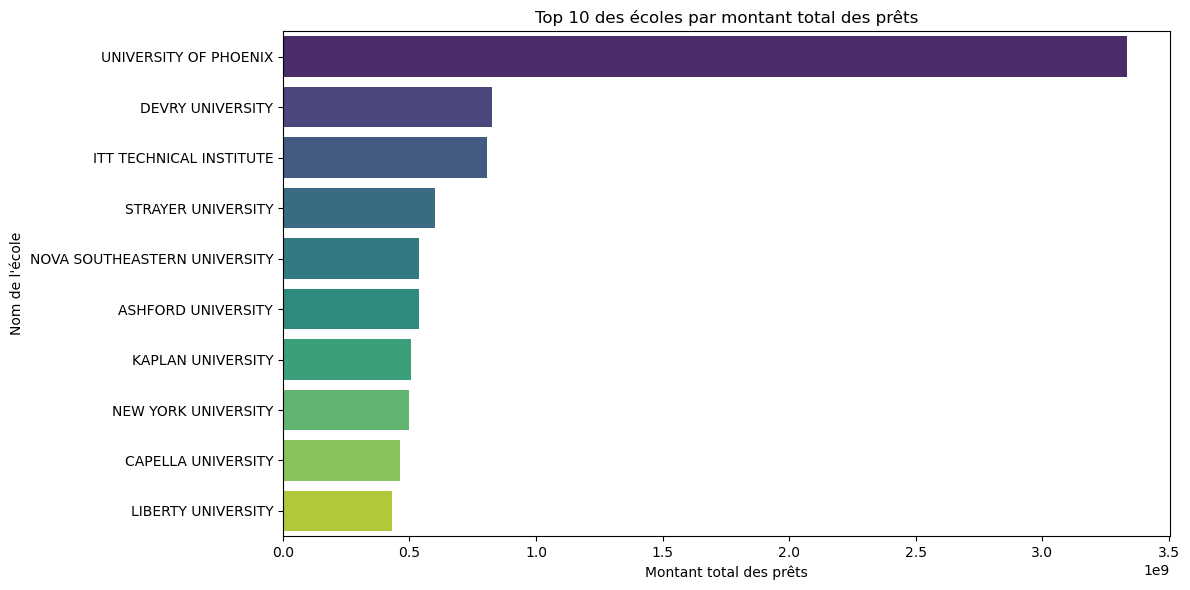

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Trier les écoles par montant total des prêts
pdf_total_loans_per_school = pdf_total_loans_per_school.sort_values(by='Total_Loans', ascending=False)

# Sélectionner les top 10 écoles
top_schools = pdf_total_loans_per_school.head(10)

# Créer un graphique en barres
plt.figure(figsize=(12,6))
sns.barplot(data=top_schools, x='Total_Loans', y='SchoolName', palette='viridis')
plt.title('Top 10 des écoles par montant total des prêts')
plt.xlabel('Montant total des prêts')
plt.ylabel('Nom de l\'école')
plt.tight_layout()
plt.show()


/var/folders/rm/47tt4n7s30533krtvlkg53340000gn/T/ipykernel_47431/256624065.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pdf_total_loans_per_state, x='State', y='Total_Loans', palette='magma')


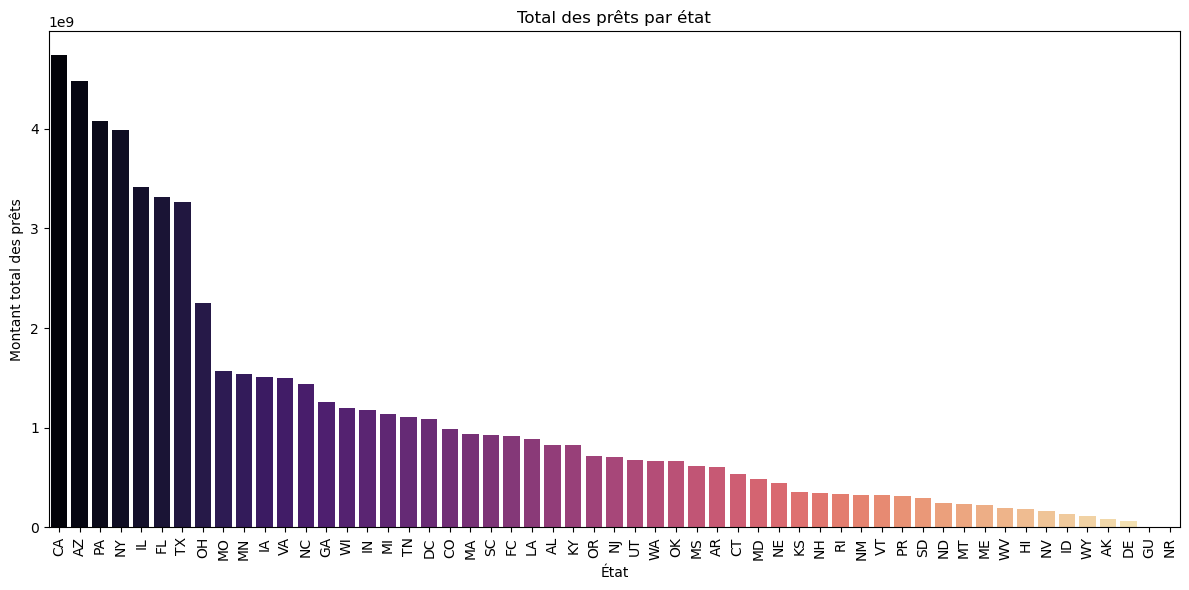

In [6]:
# Trier les états par montant total des prêts
pdf_total_loans_per_state = pdf_total_loans_per_state.sort_values(by='Total_Loans', ascending=False)

# Créer un graphique en barres
plt.figure(figsize=(12,6))
sns.barplot(data=pdf_total_loans_per_state, x='State', y='Total_Loans', palette='magma')
plt.title('Total des prêts par état')
plt.xlabel('État')
plt.ylabel('Montant total des prêts')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()


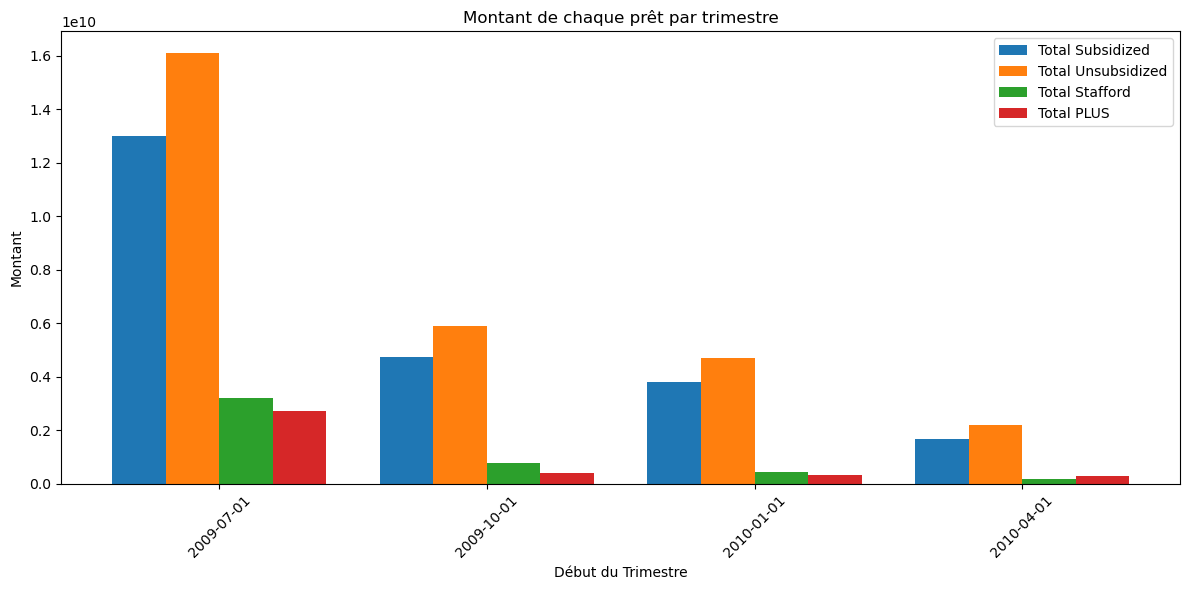

In [7]:
import pandas as pd
import numpy as np

df = pdf_loan_evolution

df['Quarter_Start'] = pd.to_datetime(df['Quarter_Start'], format='%m/%d/%Y')

df = df.sort_values('Quarter_Start')

bar_width = 0.2
quarters = df['Quarter_Start'].dt.strftime('%Y-%m-%d')
x = np.arange(len(quarters))

# Création de la figure et de l'axe
fig, ax = plt.subplots(figsize=(12, 6))

# Tracer les barres pour chaque type de prêt
ax.bar(x - 1.5*bar_width, df['Total_Subsidized'], width=bar_width, label='Total Subsidized')
ax.bar(x - 0.5*bar_width, df['Total_Unsubsidized'], width=bar_width, label='Total Unsubsidized')
ax.bar(x + 0.5*bar_width, df['Total_Stafford'], width=bar_width, label='Total Stafford')
ax.bar(x + 1.5*bar_width, df['Total_PLUS'], width=bar_width, label='Total PLUS')

ax.set_xlabel('Début du Trimestre')
ax.set_ylabel('Montant')
ax.set_title('Montant de chaque prêt par trimestre')
ax.set_xticks(x)
ax.set_xticklabels(quarters, rotation=45)
ax.legend()

plt.tight_layout()
plt.show()